## Overview
This tutorial demonstrates how to create a project management agent that assists in project management tasks including creating actionable tasks from a given project description, identify the dependency within the tasks, create a Gantt chart demonstrating the schedule of the project, and assign to project members based on their expertise and experience. This application uses a combination of custom functions, structured output, and an agent that can streamline the project management process

## Motivation
Effective management is key to project success. However, it include processes that are not only repetitive and time consuming but also prone to human error, which can lead to inefficiences, missed deadlines, misaligned resources, and an overall reduced productivity
<br/> <br/>
The ```Project Management AI Agent``` was created to transfrom how projects are managed by introducing automation, intelligence, and precision into the process. It enables teams to seamless translate project description into structure, actionable plans, mapping dependencies for better workflow alignment, create clear and visually intuitive Gantt charts, and assign tasks based on team members' expertise and experience
<br/> <br/>
This AI-driven approach reduces the burden of manual planning and eliminates redundancies, allowing project managers to shift therir focus to higher-level strategy and decision making.

## Key Components
<ol>
    <li>
        <b>LangGraph</b>: Organize the overall workflow of the agent, managing the flow of infromation between different nodes and stages of the agent
    </li>
    <li>
        <b>GPT-4</b>: Extracts actionable items from the project description, map dependencies, create gantt chart scheduling tasks, allocate tasks to team, and assess the risks
    </li>
    <li>
        <b>Gradio</b>: Building sleek and user friendly user interface
    </li>
</ol>

## Key Classes
<b>State Management</b>
<br/>
<ol>
    <li>
        <b>AgentState</b>
        <ul>
            <li><b>project_description</b>: Description of the project</li>
            <li><b>team</b>: The team available</li>
            <li><b>tasks</b>: List of tasks</li>
            <li><b>dependencies</b>: List of dependencies of tasks</li>
            <li><b>schedule</b>: Project schedule created by the agent</li>
            <li><b>task_allocations</b>: List of team member and task allocated to them</li>
            <li><b>risks</b>: Risks associated with the tasks</li>
            <li><b>project_risk_score</b>: Overall risk score of the project</li>
            <li><b>previous_project_risk_score</b>: The risk calculated in the previous feedback loop</li>
            <li><b>iteration_number</b>: Number of times the agent will go into e feck</li>
            <li><b>previous_project_risk_score</b>: The risk calculated in the previous feedback loop</li>
            <li><b>iteration_number</b>: The current iteration number in feedback loop</li>
            <li><b>max_iteration</b>: The maximum number of time it can go into feedback loop to improve itself</li>
            <li><b>insights</b>: Insights generated to improve the response</li>
        </ul>
    </li>
    <li>
        <b>Task</b>
        <ul>
            <li><b>id</b>: Id for the task</li>
            <li><b>task_name</b>: Name of the task</li>
            <li><b>task_description</b>: Description of task</li>
            <li><b>estimated_day</b>: Estimated time the task will take to complete</li>
        </ul>
    </li>
    <li>
        <b>TaskDependency</b>
        <ul>
            <li><b>task</b>: Name of the task</li>
            <li><b>dependent_task</b>: Name of the dependent task</li>
        </ul>
    </li>
    <li>
        <b>Team Member</b>
        <ul>
            <li><b>name</b>: Name of the team member</li>
            <li><b>profile</b>: Profile of the member</li>
        </ul>
    </li>
    <li>
        <b>Team</b>
        <ul>
            <li><b>team_member</b>: Members in the team</li>
        </ul>
    </li>
    <li>
        <b>TaskAllocation</b>
        <ul>
            <li><b>task</b>: Name of the task allocated</li>
            <li><b>team_member</b>: To whom the task is allocated</li> 
        </ul>
    </li>
    <li>
        <b>TaskSchedule</b>
        <ul>
            <li><b>task</b>: Task name</li>
            <li><b>start_day</b>: When the task should start</li>
            <li><b>end_day</b>: When the task will end</li>
        </ul>
    </li>
    <li>
        <b>TaskList</b>
        <ul>
            <li><b>tasks</b>: List of tasks name</li>
        </ul>
    </li>
    <li>
        <b>DependencyList</b>
        <ul>
            <li><b>dependencies</b>: List of dependent tasks</li>
        </ul>
    </li>
    <li>
        <b>Schedule</b>
        <ul>
            <li><b>schedule</b>: List of task schedule</li>
        </ul>
    </li>
    <li>
        <b>TaskAllocationList</b>
        <ul>
            <li><b>task_allocations</b>: List of allocated tasks</li>
        </ul>
    </li>
    <li>
        <b>Risk</b>
        <ul>
            <li><b>task</b>: Task name</li>
            <li><b>score</b>: Risk score for that task</li>
        </ul>
    </li>
    <li>
        <b>RiskList</b>
        <ul>
            <li><b>risks</b>: List of risks</li>
        </ul>
    </li>
</ol>


## Key Nodes and Functions
<ol>
    <li>
        <b>task_generation</b>: Node that will extract tasks from given project description
    </li>
    <li>
        <b>task_dependencies</b>: Node that will evaluate the dependencies between the tasks
    </li>
    <li>
        <b>task_scheduler</b>: Node that will schedule tasks based on dependencies and teak availability
    </li>
    <li>
        <b>task_allocator</b>: Node that will allocate tasks to team members
    </li>
    <li>
        <b>risk_assessor</b>: Node that analyze risk associated with schedule and allocation of task
    </li>
    <li>
        <b>insight_generator</b>: Node that generate insights from the schedule, task allocation and risk associated
    </li>
    <li>
        <b>router</b>: A helper function that will route the agent to the appropriate node based on the project description
    </li>
</ol>

### Visual Representation of the Agent

![Project Manager Assistant](../images/project_manager_agent.png)

### Install and import tutorial specific libraries

In [2]:
!pip install --quiet langchain, langchain-openai, pandas, plotly

In [105]:
import os
import uuid
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta
from typing import List, TypedDict
from pydantic import BaseModel, Field
from langchain_openai import AzureChatOpenAI, ChatOpenAI
from langgraph.graph import StateGraph, START,END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display, Markdown
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [5]:
# Define your model provider
model_provider = 'Azure' # 'Azure' or 'OpenAI' or 'Gemini'ArithmeticError

### Instantiate LLM model

In [6]:
if model_provider == 'Azure':
    """
    Define your environmental variables under .venv:
        - AZURE_CHAT_OPENAI_API_KEY    
        - OPENAI_API_VERSION
        - AZURE_OPENAI_ENDPOINT
    """
    llm = AzureChatOpenAI(
        azure_deployment='gpt-4o-mini',
        temperature=0.0,
    )
elif model_provider == 'OpenAI':
    """
    Define your environmental variables under .venv:
        - OPENAI_API_KEY
        - OPENAI_API_BASE
    """
#elif model_prodider == 'Gemini':
#    """
#    Define your environmental variables under .venv:
#        - GEMINI_API_KEY
#    """
#    llm = GeminiChat()
                          
else:
    print('Implement your own llm loader')

## Implementation

In the following section, we will step-by-step implement:
- The data classes,
- Agent state,
- Nodes and function,
- and the workflow of the agent.

As part of the work - we will assess our progress by creating sub-sections of the workflow and test it.

As part of this tutorial, we are using a dummy dataset both for the project description as well as the team. Please feel free to define your own inputs.

Let's create all required data classes

In [10]:
# Data Models
class Task(BaseModel):
    id: uuid.UUID = Field(default_factory=uuid.uuid4, description="Unique identifier for the task")
    task_name: str = Field(description="Name of the task")
    task_description: str = Field(description="Description of the task")
    estimated_day: int = Field(description="Estimated number of days to complete the task")

class TaskList(BaseModel):
    tasks: List[Task] = Field(description="List of tasks")

class TaskDependency(BaseModel):
    """Task dependency model"""
    task: Task = Field(description="Task")
    dependent_tasks: List[Task] = Field(description="List of dependent tasks")

class TeamMember(BaseModel):
    name: str = Field(description="Name of the team member")
    profile: str = Field(description="Profile of the team member")

class Team(BaseModel):
    team_members: List[TeamMember] = Field(description="List of team members")

# Iterative assessment
class TaskAllocation(BaseModel):
    """Task allocation class"""
    task: Task = Field(description="Task")
    team_member: TeamMember = Field(description="Team members assigned to the task")

class TaskSchedule(BaseModel):
    """Schedule schedule class"""
    task: Task = Field(description="Task")
    start_day: int = Field(description="Start day of the task")
    end_day: int = Field(description="End day of the task")

# Lists
class DependencyList(BaseModel):
    """List of task dependencies"""
    dependencies: List[TaskDependency] = Field(description="List of task dependencies")

class Schedule(BaseModel):
    schedule: List[TaskSchedule] = Field(description="List of task schedules")

class TaskAllocationList(BaseModel):
    task_allocations: List[TaskAllocation] = Field(description="List of task allocations")

# Iteration
class TaskAllocationListIteration(BaseModel):
    task_allocations_iteration: List[TaskAllocationList] = Field(description="List of task allocations for each iteration")

class ScheduleIteration(BaseModel):
    schedule: List[Schedule] = Field(description="List of task schedules for each iteration")

class Risk(BaseModel):
    task: Task = Field(description="Task")
    score: str = Field(description="Risk associated with the task")

class RiskList(BaseModel):
    risks: List[Risk] = Field(description="List of risks")

class RiskListIteration(BaseModel):
    risks_iteration: List[RiskList] = Field(description="List of risks for each iteration")

Let's then create the AgentState:

In [11]:
class AgentState(TypedDict):
    """The project manager agent state."""
    project_description: str
    team: Team
    tasks: TaskList
    dependencies: DependencyList
    schedule: Schedule
    task_allocations: TaskAllocationList
    risks: RiskList
    iteration_number: int
    max_iteration: int
    insights: List[str]
    schedule_iteration: List[Schedule]
    task_allocations_iteration: List[TaskAllocationList]
    risks_iteration: List[RiskListIteration]
    project_risk_score_iterations: List[int]

Let's create the required nodes. As a quick recap:

The workflow is defined using so called nodes and their chaining in a particular order. In LangGraph a node is defined as a function which has an argument the `AgentState`. Within the node certain attributes of the field state is updated which at the end of the node is returned and passed further to the next node.

In this tutorial we have followed the pattern:

``` code
def task_generation_node(state: AgentState):
 """LangGraph node that will extract tasks from given project description"""
    description = state["project_description"]
    prompt = f"""You are an experienced project description analyzer. Analyze the 
    project description '{description}' and create a list of actionable and
    realistic tasks with estimated time (in days) to complete each task.
    If the task takes longer than 5 days, break it down into independent smaller tasks.
    """
    structure_llm = llm.with_structured_output(TaskList)
    tasks: TaskList = structure_llm.invoke(prompt)
    state['tasks'] = tasks
    return state
```
In almost all nodes, we used:
- `llm.with_structured_output(<structure>)` - generating structured output. 

The only exception is the insight_generation_node where only `str` as requested from the llm and the required interface only `llm.invoke(prompt)`

In [46]:
# Workflow Nodes
def task_generation_node(state: AgentState):
    """LangGraph node that will extract tasks from given project description"""
    description = state["project_description"]
    prompt = f"""You are an experienced project description analyzer. Analyze the 
    project description '{description}' and create a list of actionable and
    realistic tasks with estimated time (in days) to complete each task.
    If the task takes longer than 5 days, break it down into independent smaller tasks.
    """
    structure_llm = llm.with_structured_output(TaskList)
    tasks: TaskList = structure_llm.invoke(prompt)
    return {"tasks": tasks}

def task_dependency_node(state: AgentState):
    """Evaluate the dependencies between the tasks"""
    tasks = state["tasks"]
    prompt = f"""
    Assess dependency between tasks {tasks}. For each task, identify the blocking tasks.
    Provide for each task the list of dependent tasks.
    """
    structure_llm = llm.with_structured_output(DependencyList)
    dependencies: DependencyList = structure_llm.invoke(prompt)
    return {"dependencies": dependencies}

def task_scheduler_node(state: AgentState):
    """LangGraph node that will schedule tasks based on dependencies and team availability"""
    dependencies = state["dependencies"]
    tasks = state["tasks"]
    insights = state["insights"] #"" if state["insights"] is None else state["insights"].insights[-1]
    prompt = f"""You are a project scheduler. You have the following {tasks}.
    Schedule tasks based on the dependencies {dependencies},
    Take into account the insights {insights}.
    Take into previous schedule iteration if any {state["schedule_iteration"]}.
    """
    schedule_llm = llm.with_structured_output(Schedule)
    schedule: Schedule = schedule_llm.invoke(prompt)
    state["schedule"] = schedule
    state["schedule_iteration"].append(schedule)
    return state

def task_allocation_node(state: AgentState):
    """LangGraph node that will allocate tasks to team members"""
    tasks = state["tasks"]
    schedule = state["schedule"]
    team = state["team"]
    insights = state["insights"] #"" if state["insights"] is None else state["insights"].insights[-1]
    prompt = f"""You are a project manager. You have tasks {tasks} and schedule {schedule}.
        Allocate tasks to team members {team} based on their skills and availability,
        such that there is no overlapping task assigned to a team member.
        Take into account the insights {insights}
        Take into previous task allocation iteration if any {state["task_allocations_iteration"]}.
        """
    structure_llm = llm.with_structured_output(TaskAllocationList)
    task_allocations: TaskAllocationList = structure_llm.invoke(prompt)
    state["task_allocations"] = task_allocations
    state["task_allocations_iteration"].append(task_allocations)
    return state

def risk_assessment_node(state: AgentState):
    """LangGraph node that analyse risk associated with schedule and allocation of task"""
    schedule = state["schedule"]
    task_allocations=state["task_allocations"]
    prompt = f"""You are an experienced project risk analyzer. You have to analyze the risk 
    task allocated {task_allocations} and the schedule {schedule} suggested for the task. Return
    a risk score for each assigned task. Risk score should be an integer between 0 and 10."""
    structure_llm = llm.with_structured_output(RiskList)
    risks: RiskList = structure_llm.invoke(prompt)
    project_task_risk_scores = [int(risk.score) for risk in risks.risks]
    project_risk_score = sum(project_task_risk_scores)
    state["risks"] = risks
    state["project_risk_score"] = project_risk_score
    state["iteration_number"] += 1
    state["project_risk_score_iterations"].append(project_risk_score)
    return state

def insight_generation_node(state: AgentState):
    """LangGraph node that generate insights from the schedule, task allocation, and risk associated"""
    schedule = state["schedule"]
    task_allocations=state["task_allocations"]
    risks = state["risks"]
    prompt = f"""You are an experienced project manager. You have to generate critical insights
    based on the task allocation {task_allocations}, the schedule {schedule} suggested for the task
    and a risk analysis report {risks}. Return a list of critical insights that . 
    """
    #structure_llm=llm.with_structured_output"insights"].append(structure_llm.invoke(prompt))
    insights = llm.invoke(prompt).content
    return {"insights": insights}

The proposed agentic workflow contains a conditional assessment of the state: in the form of a router. A router based on current  

In [47]:
def router(state: AgentState):
    """LangGraph node that will route the agent to the appropriate node based on the project description"""
    max_iteration = state.get("max_iteration", 2)
    iteration_number = state["iteration_number"]

    if iteration_number < max_iteration:
        if len(state["project_risk_score_iterations"])>1:
            if state["project_risk_score_iterations"][-1] < state["project_risk_score_iterations"][0]:
                return END
            else:
                return "insight_generator"
        else:
            return "insight_generator"
    else:
        return END

As we #TODO

We can define the agentic workflow using LangGraph.

In [94]:
# Instantiate the workflow    
workflow = StateGraph(AgentState)

# Add nodes to the workflow
workflow.add_node("task_generation", task_generation_node)
workflow.add_node("task_dependencies", task_dependency_node)
workflow.add_node("task_scheduler", task_scheduler_node)
workflow.add_node("task_allocator", task_allocation_node)
workflow.add_node("risk_assessor", risk_assessment_node)
workflow.add_node("insight_generator", insight_generation_node)

# Add edges to the workflow
workflow.set_entry_point("task_generation")
workflow.add_edge("task_generation", "task_dependencies")
workflow.add_edge("task_dependencies", "task_scheduler")
workflow.add_edge("task_scheduler", "task_allocator")
workflow.add_edge("task_allocator", "risk_assessor")
workflow.add_conditional_edges("risk_assessor", router, ["insight_generator", END])
workflow.add_edge("insight_generator", "task_scheduler")

# Set up memory
memory = MemorySaver()

# Compile the workflow
graph_plan = workflow.compile(checkpointer=memory)

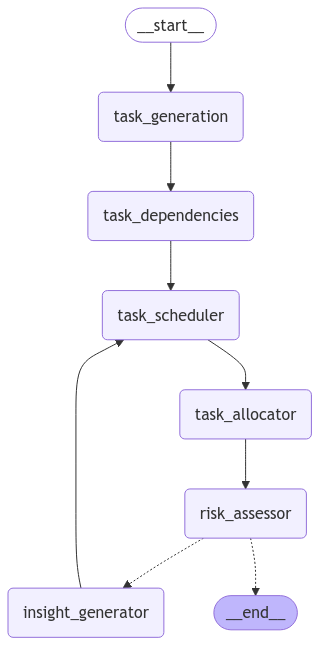

In [95]:
# To visualize the created workflow, we can use 
display(Image(graph_plan.get_graph(xray=1).draw_mermaid_png()))

## Usage Example

#### Initiate of the AgentState by defining an input
Our Project Manager Agent requires a project description (str) and a team (Team) input next to other initialization parameters.
In this tutorial we 

In [96]:
def get_project_description(file_path:str):
    """Read the project description from the file"""
    with open(file_path, 'r') as file:
            content = file.read()

    return content

def get_team(file_path:str):
    """Read the team members from the CSV file"""
    team_df = pd.read_csv(file_path)
    team_members = [
            TeamMember(name=row['Name'], profile=row['Profile Description'])
            for _, row in team_df.iterrows()
        ]
    team = Team(team_members=team_members)

    return team

project_description = get_project_description("../data/project_manager_assistant/project_description.txt")
team = get_team("../data/project_manager_assistant/team.csv")

print(project_description)
print(team)

Our business aims to deliver a chatbot application for our customers to ensure 24/7 support and advice on product choices.
team_members=[TeamMember(name='Alice', profile='Alice is a Frontend Developer skilled in HTML CSS JavaScript and React.'), TeamMember(name='Bob', profile='Bob is a Backend Developer proficient in Python Django SQL and RESTful APIs.'), TeamMember(name='Charlie', profile='Charlie is a Project Manager experienced in Agile methodologies team leadership project planning and risk management.'), TeamMember(name='David', profile='David is a Full Stack Developer with expertise in both frontend (HTML CSS JavaScript) and backend (Node.js MongoDB) technologies.'), TeamMember(name='Eve', profile='Eve is a DevOps Engineer skilled in CI/CD pipelines Docker Kubernetes and cloud services like AWS and Azure.')]


In [97]:
# Definition of the AgentState 
state_input = {
    "project_description": project_description,
    "team": team,
    "insights": "",
    "iteration_number": 0,
    "max_iteration": 3,
    "schedule_iteration": [],
    "task_allocations_iteration": [],
    "risks_iteration": [],
    "project_risk_score_iterations": []
}

In [98]:
# Invoke the agent
config = {"configurable": {"thread_id": "1"}}
for event in graph_plan.stream(state_input, config, stream_mode=["updates"]):
    "Print the different nodes as the agent progresses"
    print(f"Current node: {next(iter(event[1]))}")


Current node: task_generation
Current node: task_dependencies
Current node: task_scheduler
Current node: task_allocator
Current node: risk_assessor
Current node: insight_generator
Current node: task_scheduler
Current node: task_allocator
Current node: risk_assessor
Current node: insight_generator
Current node: task_scheduler
Current node: task_allocator
Current node: risk_assessor


In [104]:
# Retrive the final state
final_state = graph_plan.get_state(config).values
final_state

{'project_description': 'Our business aims to deliver a chatbot application for our customers to ensure 24/7 support and advice on product choices.',
 'team': Team(team_members=[TeamMember(name='Alice', profile='Alice is a Frontend Developer skilled in HTML CSS JavaScript and React.'), TeamMember(name='Bob', profile='Bob is a Backend Developer proficient in Python Django SQL and RESTful APIs.'), TeamMember(name='Charlie', profile='Charlie is a Project Manager experienced in Agile methodologies team leadership project planning and risk management.'), TeamMember(name='David', profile='David is a Full Stack Developer with expertise in both frontend (HTML CSS JavaScript) and backend (Node.js MongoDB) technologies.'), TeamMember(name='Eve', profile='Eve is a DevOps Engineer skilled in CI/CD pipelines Docker Kubernetes and cloud services like AWS and Azure.')]),
 'tasks': TaskList(tasks=[Task(id=UUID('f5bbb0cd-1c0c-45b9-abf0-2a90a05d3566'), task_name='Define project scope and requirements', 

#### Visualize the results

In [118]:
!pip install networkx -q

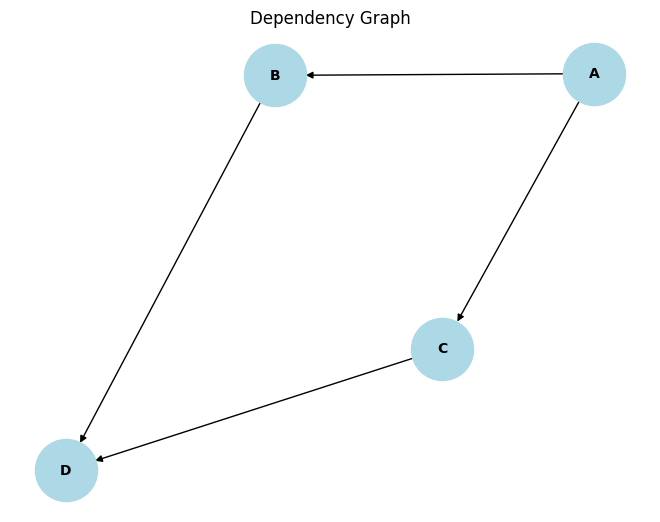

In [119]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (tasks or modules)
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')

# Add edges (dependencies)
G.add_edge('A', 'B')  # A depends on B
G.add_edge('A', 'C')  # A depends on C
G.add_edge('B', 'D')  # B depends on D
G.add_edge('C', 'D')  # C depends on D

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Dependency Graph')
plt.show()

In [116]:
number_of_iterations = final_state['iteration_number']

for i in range(number_of_iterations):
    ## Tasks schedule
    task_schedules = final_state['schedule_iteration'][i].schedule

    t = []
    # Iterate over the task_schedules and append each task's data to the DataFrame
    for task_schedule in task_schedules:
        t.append([
            task_schedule.task.task_name,
            task_schedule.start_day,
            task_schedule.end_day
        ])

    df_schedule = pd.DataFrame(t,columns=['task_name', 'start', 'end'])

    ## Tasks allocation
    task_allocations = final_state['task_allocations_iteration'][i].task_allocations

    t = []
    # Iterate over the task_schedules and append each task's data to the DataFrame
    for task_allocation in task_allocations:
        t.append([
            task_allocation.task.task_name,
            task_allocation.team_member.name
        ])

    df_allocation = pd.DataFrame(t,columns=['task_name', 'team_member'])

    df = df_allocation.merge(df_schedule, on='task_name')

    import plotly.express as px

    from datetime import datetime, timedelta
    # Get the current date
    current_date = datetime.today()

    # Convert start and end offsets to actual dates
    df['start'] = df['start'].apply(lambda x: current_date + timedelta(days=x))
    df['end'] = df['end'].apply(lambda x: current_date + timedelta(days=x))

    df.rename(columns={'team_member': 'Team Member'}, inplace=True)
    # Create a Gantt chart
    fig = px.timeline(df, x_start="start", x_end="end", y="task_name", color="Team Member", title=f"Gantt Chart - Iteration:{i+1} ")

    # Update layout for better visualization
    fig.update_layout(
        xaxis_title="Timeline",
        yaxis_title="Tasks",
        yaxis=dict(autorange="reversed"),  # Reverse the y-axis to have tasks in the vertical side
        title_x=0.5
    )

    # Show the plot
    fig.show()

## 7. Comparison

## 8. Additional Considerations

## 9. References

prompt = f"
    .....
"
structure_llm = llm.with_structured_output(<Overallproejct strcture -> AgentState>)